# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls '/content/drive/MyDrive/Colab Notebooks/Project/data/'

SVHN_single_grey1.h5


## **Importing the necessary libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Conv2D, LeakyReLU, MaxPooling2D, Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [4]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [5]:
# Loading the data
file = '/content/drive/MyDrive/Colab Notebooks/Project/data/SVHN_single_grey1.h5'
with h5py.File(file, 'r') as h5f:
  print(h5f.keys())

  # Load training data
  X_train = h5f['X_train'][:]
  y_train = h5f['y_train'][:]

  # Load testing data
  X_test = h5f['X_test'][:]
  y_test = h5f['y_test'][:]

  # Loading validating data
  X_val = h5f['X_val'][:]
  y_val = h5f['y_val'][:]

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [6]:
print(f"""
Train set: {X_train.shape}, {y_train.shape}
Test  set: {X_test.shape}, {y_test.shape}
Val   set: {X_val.shape}, {y_val.shape}
""")


Train set: (42000, 32, 32), (42000,)
Test  set: (18000, 32, 32), (18000,)
Val   set: (60000, 32, 32), (60000,)



Check the number of images in the training and the testing dataset.

In [7]:
print(f"""
Train set: {X_train.shape[0]} images.
Test  set: {X_test.shape[0]} images.
Val   set: {X_val.shape[0]} images.
""")


Train set: 42000 images.
Test  set: 18000 images.
Val   set: 60000 images.



**Observation:**

- There are $42,000$ images in the train set, and $18,000$ images in the test set.
- There are also $60,000$ images in the validation set

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

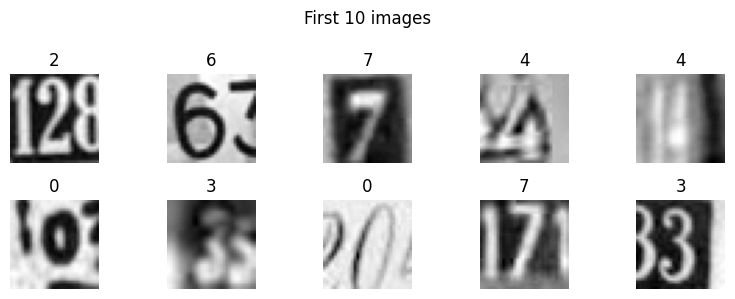

In [8]:
# Show the first 10 images
fig = plt.figure(figsize = (8, 3))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap = "gray")
    plt.title(y_train[i])
    plt.axis('off')

fig.suptitle('First 10 images')
plt.tight_layout()
plt.show()

In [9]:
pd.Series(y_train).value_counts()

3    4281
5    4232
2    4197
9    4196
7    4192
4    4188
8    4188
0    4186
1    4172
6    4168
dtype: int64

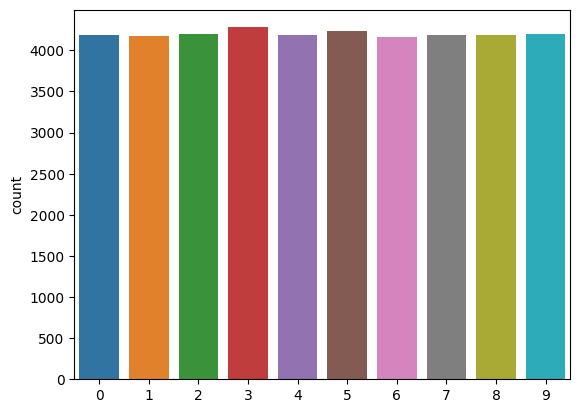

In [10]:
_ = sns.countplot(x=pd.Series(y_train))

**Observation:**

- The target variable looks to be balance (uniformly) distributed.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [11]:
# First image
print(f"""
First image
Shape: {X_train[0].shape}

Pixels:
{X_train[0]}
""")


First image
Shape: (32, 32)

Pixels:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]



### **Normalize the train and the test data**

In [12]:
X_train_norm = X_train/255
X_test_norm = X_test/255
X_val_norm = X_val/255

Print the shapes of Training and Test data

In [13]:
# Reshaping the images into 2D array
X_train_2D = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_2D  = X_test_norm.reshape(X_test_norm.shape[0], -1)
X_val_2D   = X_val_norm.reshape(X_val_norm.shape[0], -1)

print(f"""
Train set: {X_train_2D.shape}, {y_train.shape}
Test  set: {X_test_2D.shape}, {y_test.shape}
Val   set: {X_val_2D.shape}, {y_val.shape}
""")


Train set: (42000, 1024), (42000,)
Test  set: (18000, 1024), (18000,)
Val   set: (60000, 1024), (60000,)



In [14]:
X_train_norm.shape[:-2], X_train_norm.shape[0]

((42000,), 42000)

### **One-hot encode output**

In [15]:
# One-hot encode
y_train_encode = to_categorical(y_train)
y_test_encode = to_categorical(y_test)
y_val_encode = to_categorical(y_val)

print(f"""
y_train before encoding: {y_train}
Unique values: {np.unique(y_train)}
Shape: {y_train.shape}

y_train after encoding:
{y_train_encode}
Shape: {y_train_encode.shape}
""")


y_train before encoding: [2 6 7 ... 7 0 4]
Unique values: [0 1 2 3 4 5 6 7 8 9]
Shape: (42000,)

y_train after encoding:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape: (42000, 10)



**Observation:**

- We have 10 unique values in the target variable, so after encoding y_train, we have 1 column for each possible value in y_train.

## **Crating global functions to plot the accuracy and lose function.**

In [16]:
def plot_model_result(result, model_name):
    """
    Plot the accuracy and loss values of the model.
    """
    fig = plt.figure(figsize = (10, 3))

    # Plotting the Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    # Plotting the Loss
    plt.subplot(1, 2, 2)
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.suptitle(model_name)
    plt.show()

In [17]:
def plot_confussion_matrix(cm, model_name):
    """
    Plot the confussion matrix.
    """
    plt.figure(figsize = (5, 5))
    sns.heatmap(cm, annot=True, cmap="cool", fmt='g', cbar=False)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [18]:
# Clearing the keras model history
backend.clear_session()

# Fixing the seed
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

In [19]:
def nn_model_1():
    model = Sequential()

    # Input layer
    model.add(Dense(activation='relu', input_dim=1024, units=64))
    # Hidden layer
    model.add(Dense(activation='relu', units=32))
    # Output layer
    model.add(Dense(10, activation = 'softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

### **Build and train an ANN model as per the above mentioned architecture.**

In [20]:
model_1 = nn_model_1()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Batches in each Epoch
X_train_2D.shape[0]*0.8/128

262.5

In [22]:
history_1 = model_1.fit(X_train_2D, y_train_encode, validation_split=0.2, verbose=1, epochs=20, batch_size=128)

Epoch 1/20
263/263 [==============================] - 7s 5ms/step - loss: 2.2966 - accuracy: 0.1149 - val_loss: 2.2563 - val_accuracy: 0.1470
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1132 - accuracy: 0.2275 - val_loss: 1.9753 - val_accuracy: 0.3154
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 1.9138 - accuracy: 0.3293 - val_loss: 1.8557 - val_accuracy: 0.3582
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 1.8125 - accuracy: 0.3811 - val_loss: 1.7706 - val_accuracy: 0.4001
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.7037 - accuracy: 0.4256 - val_loss: 1.6556 - val_accuracy: 0.4427
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.5946 - accuracy: 0.4629 - val_loss: 1.5464 - val_accuracy: 0.4857
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.5175 - accuracy: 0.4941 - val_loss: 1.5090 - val_accuracy: 0.4979
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

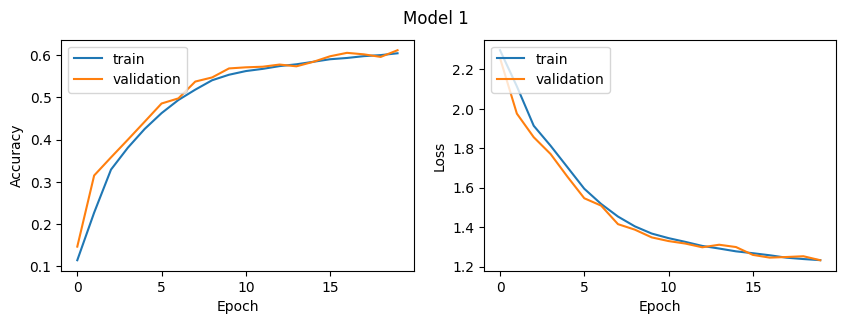

In [23]:
plot_model_result(history_1, 'Model 1')

**Observations:**

- For 20 epochs, we are getting an accuracy of about 67% in the training data as in the validation data.
- We can see from the above plot that the model has done similarly in the training set as in the validation set, however the model is performing poorly.
- There is a fluctuation around epoch 15, maybe trying a learning rate smaller we can see the behavior in train data and in validation data.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [24]:
# Clearing the keras model history
backend.clear_session()

# Fixing the seed
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

In [25]:
def nn_model_2():
    model = Sequential()

    # Input layer
    model.add(Dense(activation='relu', input_dim=1024, units=256))
    # Hidden layer
    model.add(Dense(activation='relu', units=128))
    model.add(Dropout(0.2))
    model.add(Dense(activation='relu', units=64))
    model.add(Dense(activation='relu', units=64))
    model.add(Dense(activation='relu', units=32))
    model.add(BatchNormalization())
    # Output layer
    model.add(Dense(10, activation = 'softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

### **Build and train the new ANN model as per the above mentioned architecture**

In [26]:
model_2 = nn_model_2()
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [27]:
# Batches in each Epoch
X_train_2D.shape[0]*0.8/128

262.5

In [28]:
history_2 = model_2.fit(X_train_2D, y_train_encode, validation_split=0.2, verbose=1, epochs=30, batch_size=128)

Epoch 1/30
263/263 [==============================] - 6s 9ms/step - loss: 2.3277 - accuracy: 0.0990 - val_loss: 2.3063 - val_accuracy: 0.0963
Epoch 2/30
263/263 [==============================] - 2s 6ms/step - loss: 2.3036 - accuracy: 0.1051 - val_loss: 2.2994 - val_accuracy: 0.1054
Epoch 3/30
263/263 [==============================] - 2s 6ms/step - loss: 2.1215 - accuracy: 0.2011 - val_loss: 1.9763 - val_accuracy: 0.2895
Epoch 4/30
263/263 [==============================] - 1s 5ms/step - loss: 1.6067 - accuracy: 0.4441 - val_loss: 1.4775 - val_accuracy: 0.5421
Epoch 5/30
263/263 [==============================] - 1s 5ms/step - loss: 1.3450 - accuracy: 0.5522 - val_loss: 1.2734 - val_accuracy: 0.5969
Epoch 6/30
263/263 [==============================] - 1s 5ms/step - loss: 1.2291 - accuracy: 0.6012 - val_loss: 1.1368 - val_accuracy: 0.6296
Epoch 7/30
263/263 [==============================] - 1s 5ms/step - loss: 1.1580 - accuracy: 0.6285 - val_loss: 1.0669 - val_accuracy: 0.6595
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

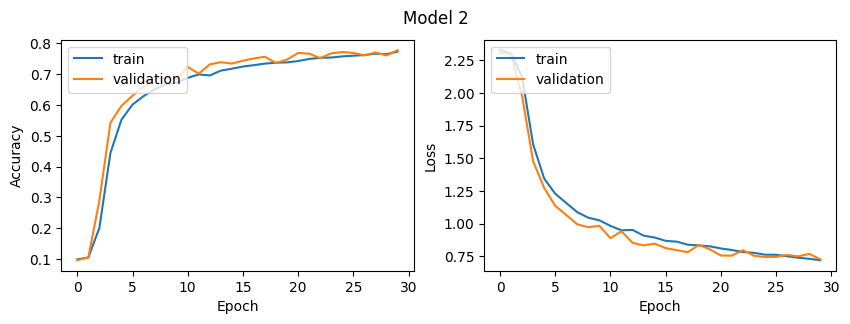

In [29]:
plot_model_result(history_2, 'Model 2')

**Observations:**

- For 30 epochs, we are getting an accuracy of about 76% in the training data as in the validation data. We can see from the above plot that the model has done similarly in the training set as in the validation set.
- Even do, there is an improvement in the model, we still having a poor performance in the data.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [30]:
# Make predictions on the test set
y_pred = model_2.predict(X_test_2D)
y_pred = [np.argmax(i) for i in y_pred]
print(f"""
First 10 predicted values:
{y_pred[:10]}
""")

563/563 [==============================] - 1s 2ms/step

First 10 predicted values:
[2, 7, 2, 9, 0, 9, 3, 5, 1, 4]



**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [31]:
# Confusion matrix
cm = confusion_matrix([int(x) for x in y_test], y_pred)
cm

array([[1281,   68,   55,   39,   74,   15,   92,   27,   50,  113],
       [   6, 1535,   34,   45,   74,   14,   16,   51,   29,   24],
       [   2,   38, 1488,   47,   46,   25,   10,   71,   31,   45],
       [  12,   54,   82, 1274,   38,  127,   14,   39,   45,   34],
       [  14,   70,   39,   20, 1554,   21,   20,   13,   21,   40],
       [  12,   39,   37,  181,   18, 1277,   53,   12,   84,   55],
       [  23,   43,   29,   30,   99,   98, 1319,   14,  156,   21],
       [   6,   99,  122,   38,   22,   18,   15, 1440,   12,   36],
       [  11,   58,   57,   64,   58,   76,   87,   12, 1313,   76],
       [  23,   59,   54,   73,   52,   55,   16,   36,   68, 1368]])

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

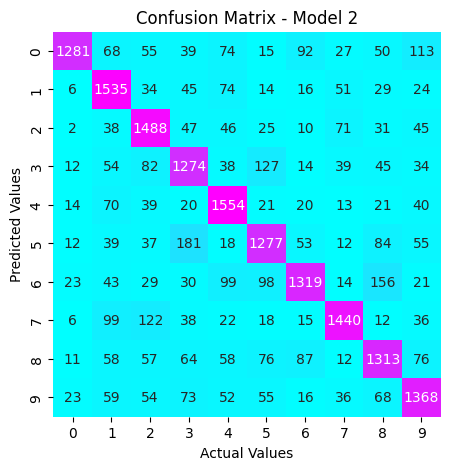

In [32]:
# Plotting the confusion matrix
plot_confussion_matrix(cm, 'Model 2')

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1814
           1       0.74      0.84      0.79      1828
           2       0.75      0.83      0.78      1803
           3       0.70      0.74      0.72      1719
           4       0.76      0.86      0.81      1812
           5       0.74      0.72      0.73      1768
           6       0.80      0.72      0.76      1832
           7       0.84      0.80      0.82      1808
           8       0.73      0.72      0.73      1812
           9       0.75      0.76      0.76      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



**Final Observations:**

- We can see that numbers 4, 7, 0, and 2 has reached the best perfomance. But we can also see that in all categories the model is not able to identify the correct digit in around 25% of cases.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [34]:
# We have preserved the original data, that's why we do not need to reload the data again
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((42000, 32, 32),
 (42000,),
 (18000, 32, 32),
 (18000,),
 (60000, 32, 32),
 (60000,))

Check the number of images in the training and the testing dataset.

In [35]:
print(f"""
Train set: {X_train.shape[0]} images.
Test  set: {X_test.shape[0]} images.
Val   set: {X_val.shape[0]} images.
""")


Train set: 42000 images.
Test  set: 18000 images.
Val   set: 60000 images.



**Observation:**

- There are $42,000$ images in the train set, and $18,000$ images in the test set.
- There are also $60,000$ images in the validation set

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [36]:
# First image
print(f"""
First image
Shape: {X_train[0].shape}

Pixels:
{X_train[0]}
""")


First image
Shape: (32, 32)

Pixels:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]



Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [37]:
# Reshaping the images into 4D array
X_train_4D = X_train_norm.reshape(*X_train_norm.shape, 1)
X_test_4D  = X_test_norm.reshape(*X_test_norm.shape, 1)
X_val_4D   = X_val_norm.reshape(*X_val_norm.shape, 1)

Normalize inputs from 0-255 to 0-1

In [38]:
# The data we have reshaped is already normalized
print(f"""
Values in X_train data goes from {round(X_train_4D.min(), 1)} to {round(X_train_4D.max(), 1)}
""")


Values in X_train data goes from 0.0 to 1.0



Print New shape of Training and Test

In [39]:
print(f"""
Train set: {X_train_4D.shape}, {y_train.shape}
Test  set: {X_test_4D.shape}, {y_test.shape}
Val   set: {X_val_4D.shape}, {y_val.shape}
""")


Train set: (42000, 32, 32, 1), (42000,)
Test  set: (18000, 32, 32, 1), (18000,)
Val   set: (60000, 32, 32, 1), (60000,)



### **One-hot encode the labels in the target variable y_train and y_test.**

In [40]:
# We have preserved the encoded y variable:
print(f"""
y_train after encoding shape: {y_train_encode.shape}
y_test after encoding shape: {y_test_encode.shape}
y_val after encoding shape: {y_val_encode.shape}
""")


y_train after encoding shape: (42000, 10)
y_test after encoding shape: (18000, 10)
y_val after encoding shape: (60000, 10)



**Observation:**

- We have 10 unique values in the target variable, so after encoding y_train, we have 1 column for each possible value in y_train.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [41]:
# Clearing the keras model history
backend.clear_session()

# Fixing the seed
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

In [42]:
def cnn_model_1():
    model = Sequential([
        Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)),
        LeakyReLU(0.1),
        Conv2D(filters=32, kernel_size=(3, 3), padding="same"),
        LeakyReLU(0.1),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(32),
        LeakyReLU(0.1),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

### **Build and train a CNN model as per the above mentioned architecture.**

In [43]:
model_3 = cnn_model_1()
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [44]:
# Batches in each Epoch
X_train_4D.shape[0]*0.8/32

1050.0

In [45]:
history_3 = model_3.fit(X_train_4D, y_train_encode, validation_split=0.2, verbose=1, epochs=20, batch_size=32)

Epoch 1/20
1050/1050 [==============================] - 11s 4ms/step - loss: 2.1059 - accuracy: 0.2928 - val_loss: 1.6354 - val_accuracy: 0.5740
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 1.2353 - accuracy: 0.6738 - val_loss: 0.9718 - val_accuracy: 0.7523
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.8641 - accuracy: 0.7684 - val_loss: 0.7976 - val_accuracy: 0.7794
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.7307 - accuracy: 0.7987 - val_loss: 0.7033 - val_accuracy: 0.8051
Epoch 5/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.6655 - accuracy: 0.8151 - val_loss: 0.6668 - val_accuracy: 0.8133
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.6207 - accuracy: 0.8262 - val_loss: 0.6510 - val_accuracy: 0.8118
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5928 - accuracy: 0.8340 - val_loss: 0.6251 - val_accuracy

### **Plot the Training and Validation Accuracies and Write your observations.**

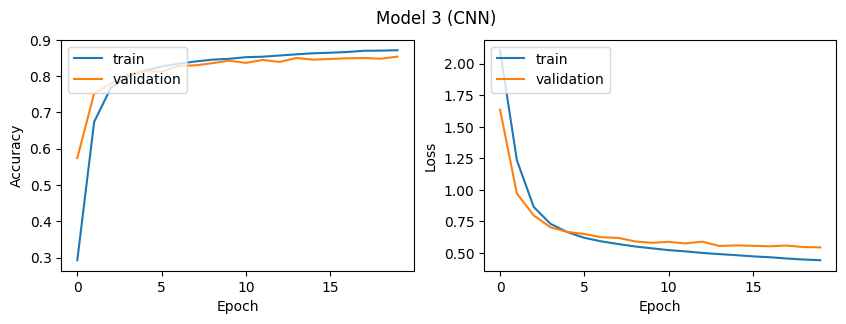

In [46]:
plot_model_result(history_3, 'Model 3 (CNN)')

**Observations:**

- The accuracy of the model in the training data is 88% meanwhile in the validation data is 85%
- We can see from the above plot that the model has improved in the training data, however, there is some overfitting.


Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [47]:
# Clearing the keras model history
backend.clear_session()

# Fixing the seed
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

In [48]:
def cnn_model_2():
    model = Sequential([
        Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)),
        LeakyReLU(0.1),
        Conv2D(filters=32, kernel_size=(3, 3), padding="same"),
        LeakyReLU(0.1),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3, 3), padding="same"),
        LeakyReLU(0.1),
        Conv2D(filters=64, kernel_size=(3, 3), padding="same"),
        LeakyReLU(0.1),
        MaxPooling2D(pool_size = (2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(32),
        LeakyReLU(0.1),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

### **Build and train the second CNN model as per the above mentioned architecture.**

In [49]:
model_4 = cnn_model_2()
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [50]:
# Batches in each Epoch
X_train_4D.shape[0]*0.8/128

262.5

In [51]:
history_4 = model_4.fit(X_train_4D, y_train_encode, validation_split=0.2, verbose=1, epochs=30, batch_size=128)

Epoch 1/30
263/263 [==============================] - 7s 13ms/step - loss: 2.1486 - accuracy: 0.2146 - val_loss: 2.2977 - val_accuracy: 0.1195
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 1.4167 - accuracy: 0.5125 - val_loss: 1.3356 - val_accuracy: 0.6020
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 1.0299 - accuracy: 0.6637 - val_loss: 0.7679 - val_accuracy: 0.7915
Epoch 4/30
263/263 [==============================] - 2s 9ms/step - loss: 0.8641 - accuracy: 0.7259 - val_loss: 0.6058 - val_accuracy: 0.8346
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 0.7683 - accuracy: 0.7591 - val_loss: 0.5631 - val_accuracy: 0.8423
Epoch 6/30
263/263 [==============================] - 3s 12ms/step - loss: 0.7097 - accuracy: 0.7767 - val_loss: 0.5257 - val_accuracy: 0.8533
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 0.6709 - accuracy: 0.7930 - val_loss: 0.4847 - val_accuracy: 0.8608


### **Plot the Training and Validation accuracies and write your observations.**

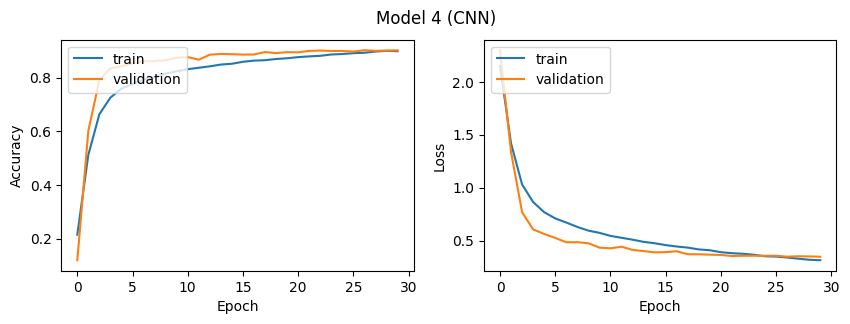

In [52]:
plot_model_result(history_4, 'Model 4 (CNN)')

**Observations:**

- The validation accuracy has improved substantially and the problem of overfitting has been solved. We can say that the model is giving a generalized performance.
- It has achieved 90.07% accuracy in training set as in validation set.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [53]:
# Make predictions on the test set
y_pred = model_4.predict(X_test_4D)
y_pred = [np.argmax(i) for i in y_pred]
print(f"""
First 10 predicted values:
{y_pred[:10]}
""")

563/563 [==============================] - 1s 2ms/step

First 10 predicted values:
[1, 7, 2, 9, 0, 9, 1, 5, 4, 4]



**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [54]:
# Confusion matrix
cm = confusion_matrix([int(x) for x in y_test], y_pred)
cm

array([[1702,   19,   13,    3,    6,    3,   25,    8,    6,   29],
       [  24, 1640,   17,   16,   47,    4,   17,   40,   12,   11],
       [  12,   18, 1648,    9,   19,    6,    5,   33,   14,   39],
       [   8,   12,   34, 1449,   22,   87,   30,   17,   34,   26],
       [  12,   34,   24,    9, 1670,    1,   18,    9,   13,   22],
       [   7,    8,    8,   54,    9, 1576,   58,    8,   16,   24],
       [  34,   10,   16,   11,   23,   43, 1625,    5,   53,   12],
       [  15,   33,   27,   15,   18,    4,   10, 1672,    3,   11],
       [  30,   18,   12,   40,   12,   18,   58,    7, 1574,   43],
       [  49,   16,   20,   15,   16,   28,   12,   17,   29, 1602]])

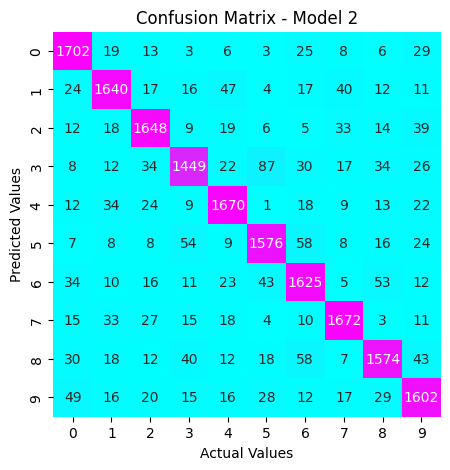

In [55]:
# Plotting the confusion matrix
plot_confussion_matrix(cm, 'Model 2')

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1814
           1       0.91      0.90      0.90      1828
           2       0.91      0.91      0.91      1803
           3       0.89      0.84      0.87      1719
           4       0.91      0.92      0.91      1812
           5       0.89      0.89      0.89      1768
           6       0.87      0.89      0.88      1832
           7       0.92      0.92      0.92      1808
           8       0.90      0.87      0.88      1812
           9       0.88      0.89      0.88      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**

- The last model seems very promising now. The validation accuracy has improved substantially and the problem of overfitting has been solved. We can say that the model is giving a generalized performance.
- It achieve 90% accuracy in training and testing data set.
- Maybe more hidden layers in feature extraction and in prediction layers can improve the accuracy of the model.